## HONDA CASE COMPETITION ANALYSIS FOR ALTERNATIVE FUEL VEHICLES

In [2]:
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


#### CUSTOMER TREND ANALYSIS - ALTERNATIVE FUEL VEHICLES

In [7]:
# Load the cleaned dataset for analysis
analysis_file_path = '/Users/tanyaarya/Documents/Honda Case Competition/Cleaned_Alternative_Fuel_Vehicles_US.csv'
analysis_data = pd.read_csv(analysis_file_path)

# Step 1: Popularity Ranking
# Count the number of vehicles by type
popularity_by_type = analysis_data['Fuel'].value_counts().reset_index()
popularity_by_type.columns = ['Electric Vehicle Type', 'Count']

# Display the popularity ranking
popularity_by_type

,Electric Vehicle Type,Count
0,Hybrid Electric,283
1,Electric,246
2,Plug-In Hybrid Electric,95
3,Biodiesel (B20),68
4,Cng - Compressed Natural Gas,44
5,Ethanol (E85),43
6,Cng - Compressed Natural Gas|Lng - Liquified N...,22
7,Diesel/Hybrid Electric,17
8,Lng - Liquified Natural Gas|Cng - Compressed N...,15
9,Hydrogen Fuel Cell,14


In [20]:
# Check for unique values in the 'Model Year' column to identify any anomalies
unique_model_years = sorted(analysis_data['Model Year'].unique())
unique_model_years

[0, 2021, 2022]

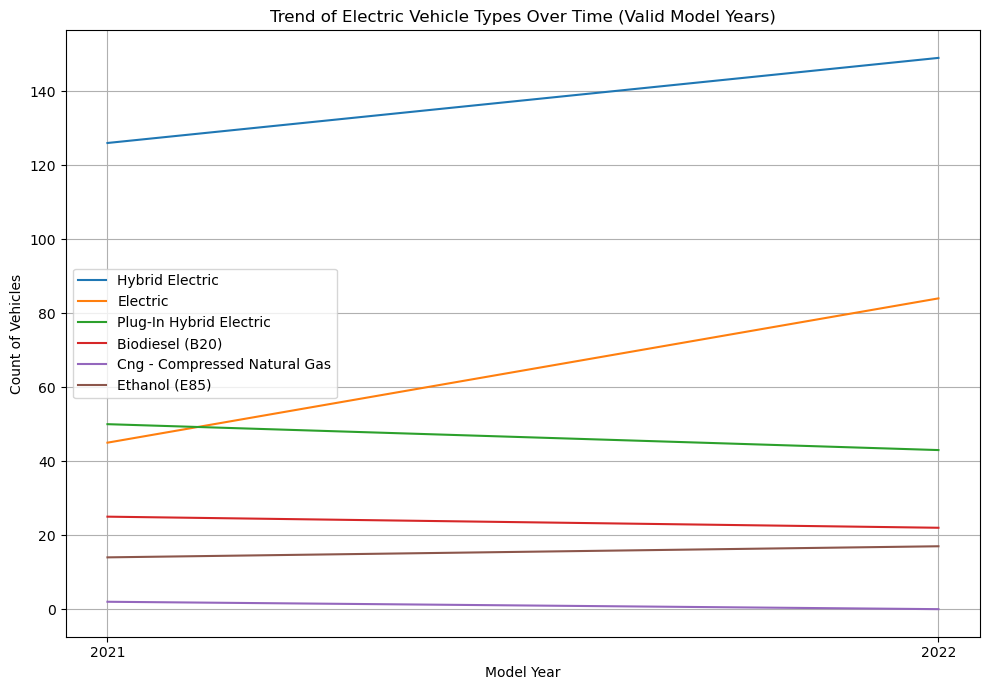

In [21]:
# Filter out the placeholder year '0' from the 'Model Year' column
valid_data = analysis_data[analysis_data['Model Year'] != 0]

# Group by 'Model Year' and 'Fuel' type and count the number of vehicles
valid_trend_over_time = valid_data.groupby(['Model Year', 'Fuel']).size().reset_index(name='Count')

# Pivot the data to have 'Model Year' as rows and 'Fuel' types as columns
valid_trend_over_time_pivot = valid_trend_over_time.pivot(index='Model Year', columns='Fuel', values='Count').fillna(0)

# Focus on the top vehicle types identified earlier
valid_trend_data = valid_trend_over_time_pivot[top_vehicle_types]

# Re-plotting the trends with valid model years and ensuring x-axis labels are whole numbers
plt.figure(figsize=(10, 7))
for vehicle_type in top_vehicle_types:
    if vehicle_type in valid_trend_data.columns:  # Check if the vehicle type is in the columns after filtering
        plt.plot(valid_trend_data.index.astype(int), valid_trend_data[vehicle_type], label=vehicle_type)

# Set the x-ticks to only the model years present in the dataset
plt.xticks(valid_trend_data.index.astype(int).unique())

plt.title('Trend of Electric Vehicle Types Over Time (Valid Model Years)')
plt.xlabel('Model Year')
plt.ylabel('Count of Vehicles')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

#### Customer trend analysis - EV

In [23]:
# Correct the filter for BEV data to match the exact string from the dataset
# The correct string seems to be 'Battery Electric Vehicle (Bev)' as per the popularity results
ev_analysis_file_path = '/Users/tanyaarya/Documents/Honda Case Competition/Cleaned_Electric_Vehicle_Population_Data.csv'
ev_data = pd.read_csv(ev_analysis_file_path)
bev_data_corrected = ev_data[ev_data['Electric Vehicle Type'] == 'Battery Electric Vehicle (Bev)']

# Count the number of BEVs by make and model again with the corrected filter
bev_make_model_counts_corrected = bev_data_corrected.groupby(['Make', 'Model']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Display the corrected results for BEV make and model counts
bev_make_model_counts_corrected.head()  # Show top 5 results for brevity

,Make,Model,Count
55,Tesla,Model 3,26766
58,Tesla,Model Y,26194
45,Nissan,Leaf,13093
56,Tesla,Model S,7542
12,Chevrolet,Bolt Ev,5599


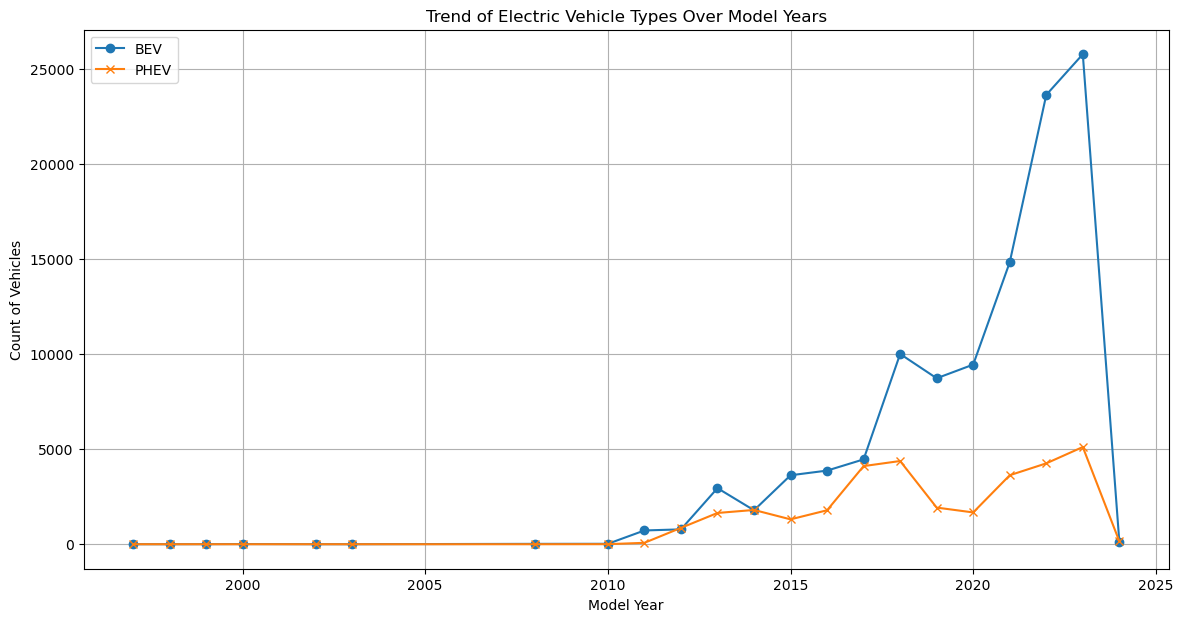

In [30]:
# Reload the dataset to ensure we have a fresh start
ev_data = pd.read_csv('/Users/tanyaarya/Documents/Honda Case Competition/Cleaned_Electric_Vehicle_Population_Data.csv')

# Recreate the 'trends_ev_types' DataFrame with the correct groupby operation to get the 'Count'
trends_ev_types = ev_data.groupby(['Model Year', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Now, create the pivot table with 'Model Year' as rows and 'Electric Vehicle Type' as columns
trends_ev_pivot = trends_ev_types.pivot(index='Model Year', columns='Electric Vehicle Type', values='Count').fillna(0)

# Plotting the trends over time for BEVs and PHEVs, ensuring that we check for the presence of the types before plotting
plt.figure(figsize=(14, 7))
if 'Battery Electric Vehicle (Bev)' in trends_ev_pivot.columns:
    plt.plot(trends_ev_pivot.index, trends_ev_pivot['Battery Electric Vehicle (Bev)'], label='BEV', marker='o')
if 'Plug-In Hybrid Electric Vehicle (Phev)' in trends_ev_pivot.columns:
    plt.plot(trends_ev_pivot.index, trends_ev_pivot['Plug-In Hybrid Electric Vehicle (Phev)'], label='PHEV', marker='x')

plt.title('Trend of Electric Vehicle Types Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Count of Vehicles')
plt.legend()
plt.grid(True)
plt.show()

### MARKET SEGMENT ANALYSIS - AFV

In [31]:
# Load the dataset for market segmentation analysis
market_data_path = '/Users/tanyaarya/Documents/Honda Case Competition/Cleaned_Alternative_Fuel_Vehicles_US.csv'
market_data = pd.read_csv(market_data_path)

# Step 1: Segment Count - Count the number of vehicles in each segment
segment_count = market_data['Category'].value_counts().reset_index()
segment_count.columns = ['Vehicle Segment', 'Count']

# Step 2: Fuel Types in Segments - Analyze the distribution of fuel types within each vehicle segment
fuel_types_in_segments = market_data.groupby(['Category', 'Fuel']).size().reset_index(name='Count')

# Step 3: Hybrid/Electric Options - Specifically identify the count of hybrid and electric vehicles within each segment
hybrid_electric_segments = fuel_types_in_segments[fuel_types_in_segments['Fuel'].isin(['Hybrid Electric', 'Electric', 'Plug-In Hybrid Electric'])]

# Display the results
(segment_count, fuel_types_in_segments, hybrid_electric_segments)

(                  Vehicle Segment  Count
 0                     Sedan/Wagon    282
 1                             Suv    222
 2                          Pickup     79
 3                     Transit Bus     77
 4          Vocational/Cab Chassis     68
 5       Passenger Van/Shuttle Bus     46
 6                             Van     23
 7                  Street Sweeper     21
 8                      School Bus     21
 9                          Refuse     16
 10                        Tractor     15
 11                       Step Van      5
 12  Tractorvocational/Cab Chassis      4
 13      Vocational/Cab Chassisvan      1
 14  Vocational/Cab Chassistractor      1,
                          Category  \
 0       Passenger Van/Shuttle Bus   
 1       Passenger Van/Shuttle Bus   
 2       Passenger Van/Shuttle Bus   
 3       Passenger Van/Shuttle Bus   
 4       Passenger Van/Shuttle Bus   
 ..                            ...   
 82         Vocational/Cab Chassis   
 83         Vocational/

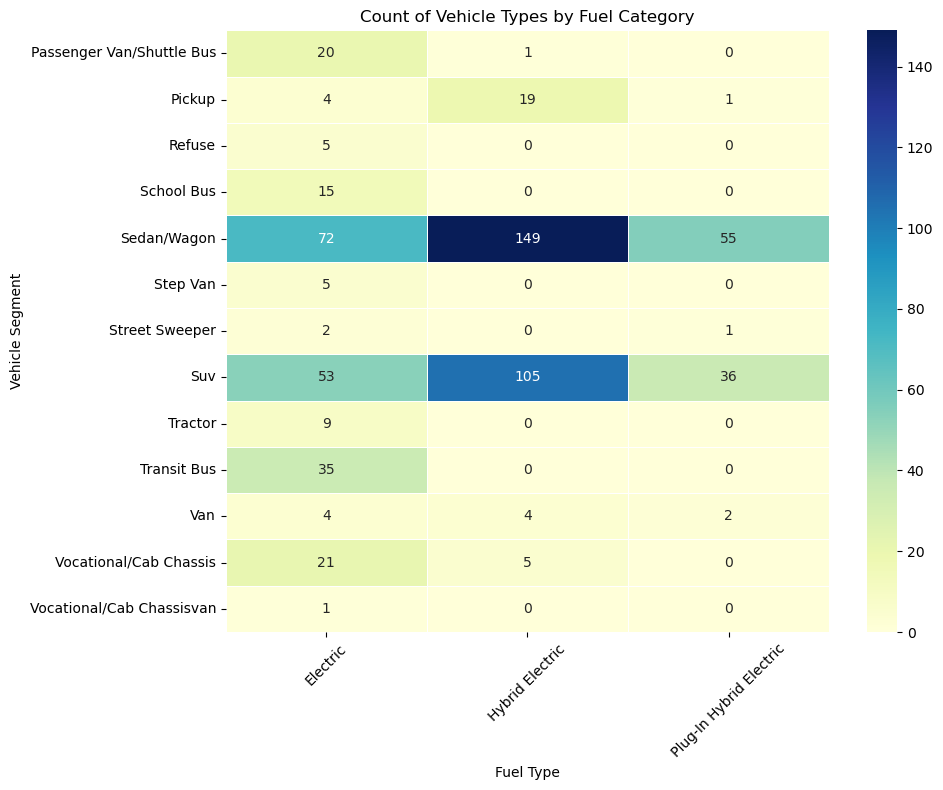

In [32]:
import seaborn as sns

# Prepare the data for visualization: we want to show each segment and the count of each fuel type within it.
# Since there are many fuel types, we will focus on the major categories mentioned: Electric, Hybrid Electric, and Plug-In Hybrid Electric.

# Filter the dataset to include only the major categories
major_fuel_types = ['Electric', 'Hybrid Electric', 'Plug-In Hybrid Electric']
segment_fuel_data = fuel_types_in_segments[fuel_types_in_segments['Fuel'].isin(major_fuel_types)]

# Create a pivot table for the heatmap
segment_fuel_pivot = segment_fuel_data.pivot(index='Category', columns='Fuel', values='Count').fillna(0)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(segment_fuel_pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)

plt.title('Count of Vehicle Types by Fuel Category')
plt.xlabel('Fuel Type')
plt.ylabel('Vehicle Segment')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

### Market Segment Analysis - EV

In [34]:
# Load the electric vehicle population data for market segmentation analysis
ev_pop_data_path = '/Users/tanyaarya/Documents/Honda Case Competition//Cleaned_Electric_Vehicle_Population_Data.csv'
ev_pop_data = pd.read_csv(ev_pop_data_path)

# Since the original dataset does not contain a direct 'segment' column, we will infer the segments from the 'Model' or 'Make'
# However, the 'Electric Vehicle Type' column is present and we can use this to find out the distribution of electric vehicle types

# Step 1: Segment Count - Count the number of electric vehicles in each segment
# For this dataset, we will consider the 'Make' as a proxy for segment, this is a simplification and may not reflect actual market segments
segment_count_ev = ev_pop_data['Make'].value_counts().reset_index()
segment_count_ev.columns = ['Vehicle Segment', 'Count']

# Step 2: Electric Vehicle Types in Segments - Analyze the distribution of electric vehicle types within each segment
# Group data by 'Make' and 'Electric Vehicle Type'
ev_types_in_segments = ev_pop_data.groupby(['Make', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Step 3 and 4: Segment Saturation and Opportunities for New Entries
# We will look at the 'Count' of each type within segments to identify saturation and opportunities

# Display the results
(segment_count_ev, ev_types_in_segments)

(         Vehicle Segment  Count
 0                  Tesla  65552
 1                 Nissan  13317
 2              Chevrolet  11816
 3                   Ford   7307
 4                    Bmw   6209
 5                    Kia   5922
 6                 Toyota   5074
 7             Volkswagen   3914
 8                  Volvo   3415
 9                   Jeep   3084
 10                  Audi   2900
 11               Hyundai   2853
 12              Chrysler   2483
 13                Rivian   2209
 14               Porsche    999
 15         Mercedes-Benz    958
 16                  Fiat    817
 17                 Honda    809
 18            Mitsubishi    797
 19                  Mini    772
 20                Subaru    502
 21              Polestar    489
 22                 Smart    271
 23               Lincoln    227
 24                Jaguar    220
 25                 Lucid    176
 26              Cadillac    143
 27                 Lexus    101
 28                 Mazda     88
 29       

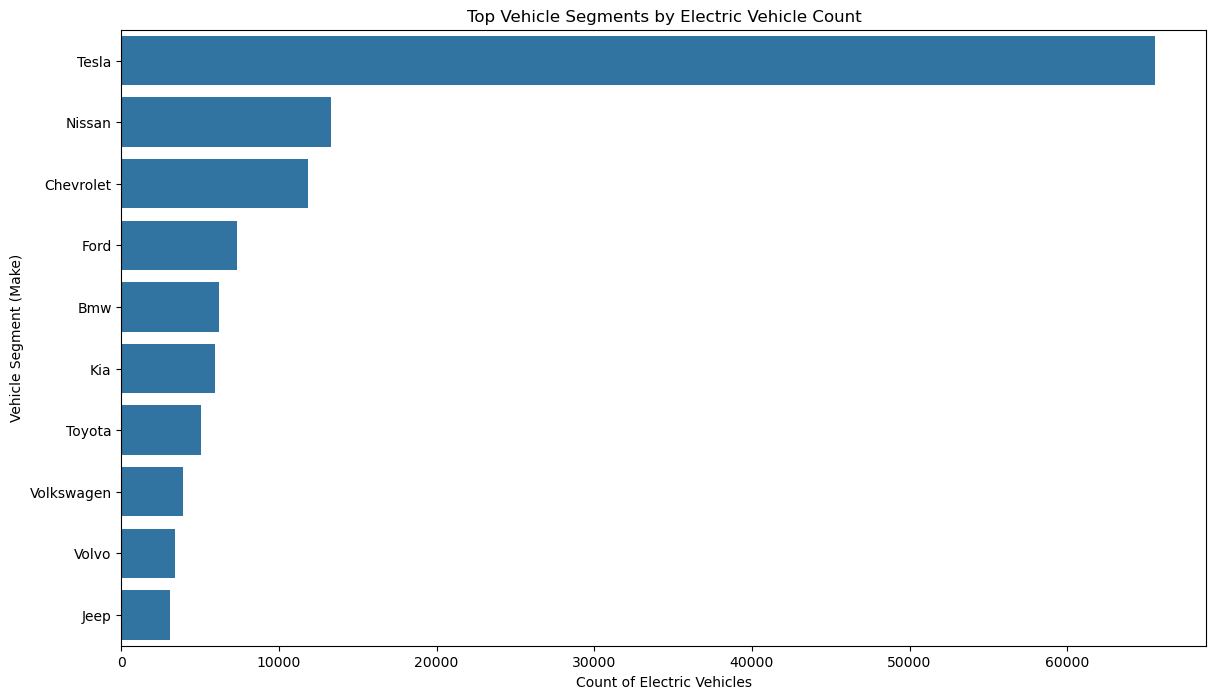

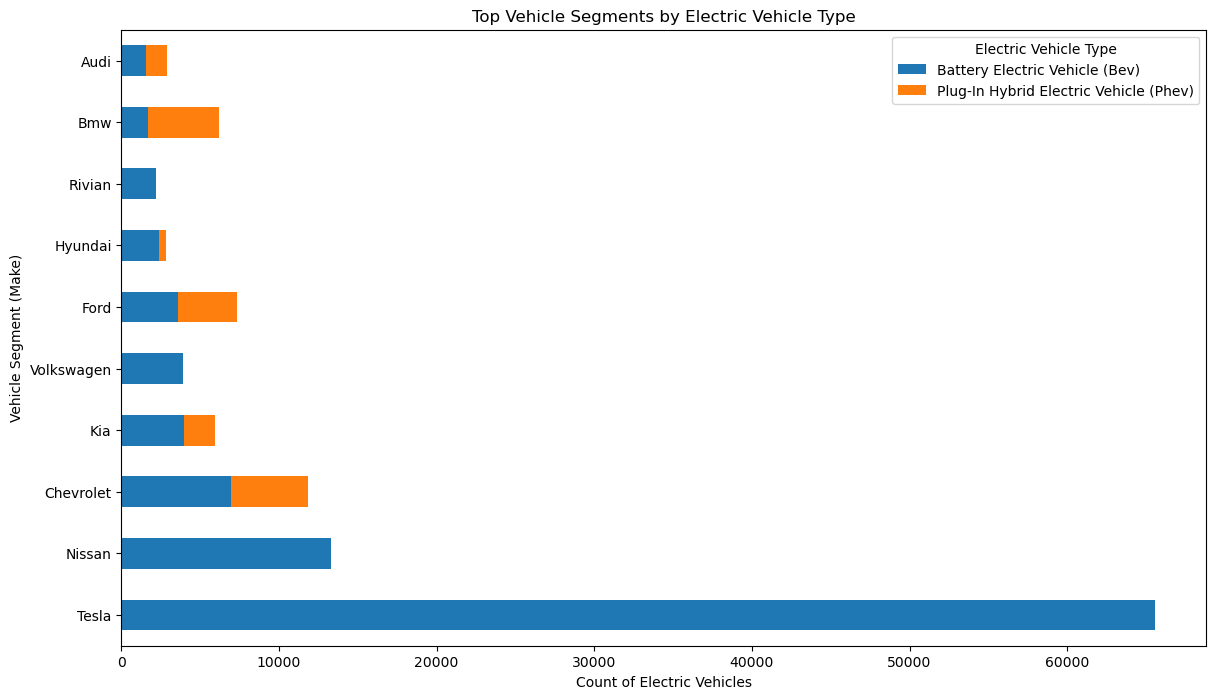

In [35]:
# Visualization of segment counts (simplified by vehicle make)
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Vehicle Segment', data=segment_count_ev.head(10))  # Top 10 for brevity
plt.title('Top Vehicle Segments by Electric Vehicle Count')
plt.xlabel('Count of Electric Vehicles')
plt.ylabel('Vehicle Segment (Make)')
plt.show()

# Visualization of electric vehicle types in segments with a stacked bar chart
# Prepare data for stacked bar chart
stacked_data = ev_types_in_segments.pivot(index='Make', columns='Electric Vehicle Type', values='Count').fillna(0)
stacked_data = stacked_data.sort_values(by='Battery Electric Vehicle (Bev)', ascending=False).head(10)  # Top 10 for brevity

# Plot
stacked_data.plot(kind='barh', stacked=True, figsize=(14, 8))
plt.title('Top Vehicle Segments by Electric Vehicle Type')
plt.xlabel('Count of Electric Vehicles')
plt.ylabel('Vehicle Segment (Make)')
plt.legend(title='Electric Vehicle Type')
plt.show()

### Cost benefit analysis - AFV

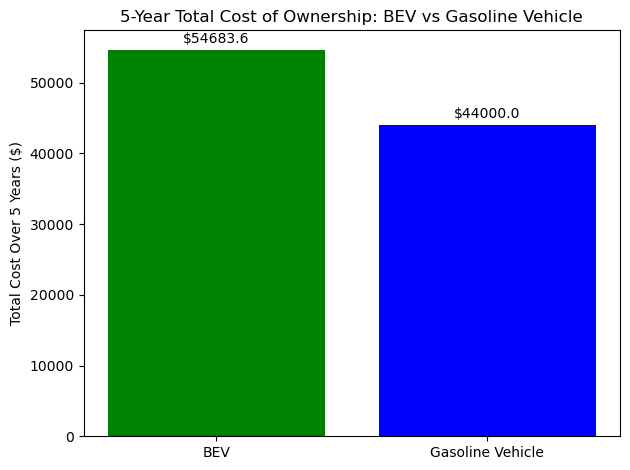

In [44]:
# Since the execution state was reset, let's re-import the necessary libraries and re-define the function and assumptions for the final code.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to calculate total ownership cost
def calculate_total_ownership_cost(msrp, annual_miles, fuel_efficiency, fuel_cost, maintenance_cost, incentive=0, years=5):
    total_fuel_cost = (annual_miles / fuel_efficiency) * fuel_cost * years
    total_maintenance_cost = maintenance_cost * years
    total_cost = (msrp - incentive) + total_fuel_cost + total_maintenance_cost
    return total_cost

# Assumptions for cost components
annual_miles_driven = 15000
electricity_cost_per_kwh = 0.13
gasoline_cost_per_gallon = 3.00
bev_miles_per_kwh = 4  # Average miles per kWh for BEVs
gasoline_miles_per_gallon = 25  # Average miles per gallon for gasoline vehicles
annual_maintenance_cost_bev = 500
annual_maintenance_cost_gasoline = 1000
incentive_bev = 7500  # One-time incentive for purchasing a BEV

# Load the datasets
cleaned_afv_us_data = pd.read_csv('/Users/tanyaarya/Documents/Honda Case Competition/Cleaned_Alternative_Fuel_Vehicles_US.csv')
cleaned_ev_population_data = pd.read_csv('/Users/tanyaarya/Documents/Honda Case Competition/Cleaned_Electric_Vehicle_Population_Data.csv')

# Calculate average MSRP for BEVs and extract average electric range from the EV population data
avg_msrp_bev = cleaned_ev_population_data['Base MSRP'][cleaned_ev_population_data['Base MSRP'] > 0].mean()
avg_electric_range = cleaned_ev_population_data['Electric Range'].mean()

# Calculate total cost for BEVs
total_cost_bev = calculate_total_ownership_cost(
    avg_msrp_bev,
    annual_miles_driven,
    bev_miles_per_kwh,
    electricity_cost_per_kwh,
    annual_maintenance_cost_bev,
    incentive_bev
)

# Corrected average MSRP for gasoline vehicles
avg_msrp_gasoline = 30000  # Corrected average MSRP for gasoline vehicles

# Calculate total cost for gasoline vehicles using corrected average MSRP
total_cost_gasoline = calculate_total_ownership_cost(
    avg_msrp_gasoline,
    annual_miles_driven,
    gasoline_miles_per_gallon,
    gasoline_cost_per_gallon,
    annual_maintenance_cost_gasoline
)

# Prepare data for visualization
cost_data = {
    'BEV': total_cost_bev,
    'Gasoline Vehicle': total_cost_gasoline
}

categories = list(cost_data.keys())
values = list(cost_data.values())

# Create bar chart
fig, ax = plt.subplots()
bar_positions = np.arange(len(categories))
ax.bar(bar_positions, values, color=['green', 'blue'])
ax.set_xticks(bar_positions)
ax.set_xticklabels(categories)
ax.set_ylabel('Total Cost Over 5 Years ($)')
ax.set_title('5-Year Total Cost of Ownership: BEV vs Gasoline Vehicle')

# Display values on the bars
for i, v in enumerate(values):
    ax.text(i, v + 1000, "$" + str(round(v, 2)), ha='center', color='black')

plt.tight_layout()
plt.show()

#### ECONOMIC ANALYSIS

Text(0, 0.5, 'Fuel Type')

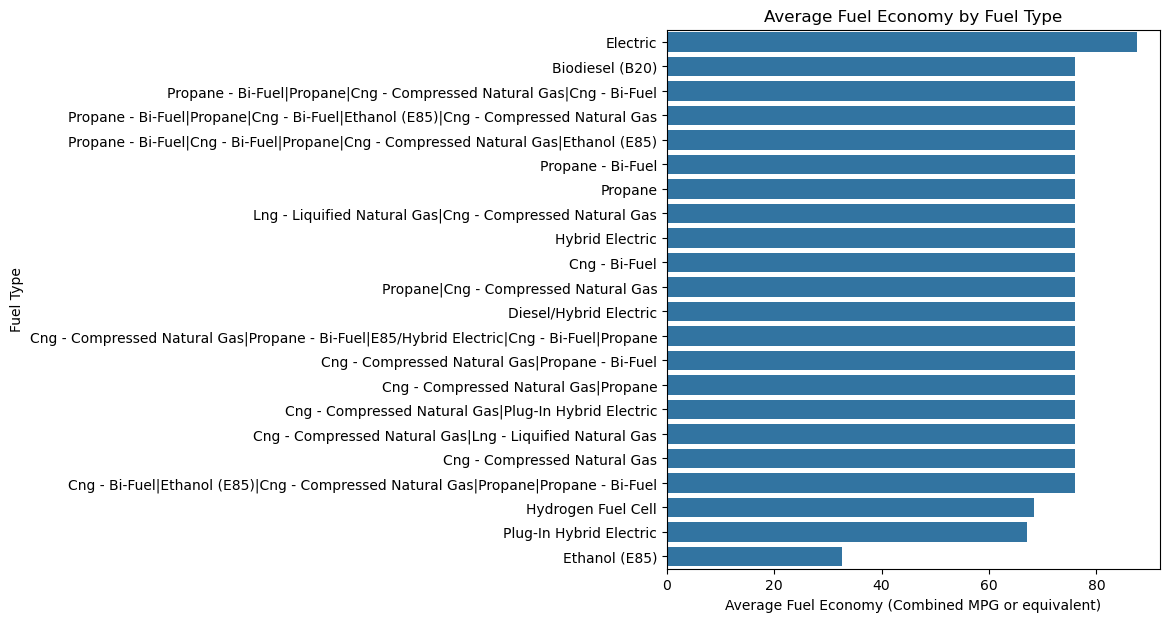

In [49]:
# Load the datasets for economic analysis
alt_fuel_data_path = '/Users/tanyaarya/Documents/Honda Case Competition/Cleaned_Alternative_Fuel_Vehicles_US.csv'
ev_pop_data_path = '/Users/tanyaarya/Documents/Honda Case Competition//Cleaned_Electric_Vehicle_Population_Data.csv'

alt_fuel_data = pd.read_csv(alt_fuel_data_path)
ev_pop_data = pd.read_csv(ev_pop_data_path)

# Confirming the column names that indicate economic metrics
# For 'Cleaned_Alternative_Fuel_Vehicles_US.csv', we'll use 'Alternative Fuel Economy Combined' and any column indicating price
# For 'Cleaned_Electric_Vehicle_Population_Data.csv', we'll use 'Electric Range' as a measure of efficiency and 'Base MSRP' for cost

# Step 1: Fuel Economy - Calculate the average for each fuel type in the alternative fuel data
alt_fuel_economy = alt_fuel_data.groupby('Fuel')['Alternative Fuel Economy Combined'].mean().sort_values(ascending=False).reset_index()

# Step 2: MSRP - Calculate the average MSRP for each vehicle type in the electric vehicle population data
# Since the electric vehicle dataset might not have a direct 'Fuel' column, we'll use 'Electric Vehicle Type' as a proxy
ev_msrp = ev_pop_data.groupby('Electric Vehicle Type')['Base MSRP'].mean().sort_values(ascending=False).reset_index()

# Step 3: Combine both datasets for a comparative analysis - we will merge on the closest approximate columns
# Since the datasets don't have a direct common column for merging, we will consider the economic analysis separately for each

# Visualization: Create bar graphs for average fuel economy and MSRP by vehicle type
plt.figure(figsize=(14, 7))

# Subplot for Average Fuel Economy by Fuel Type
plt.subplot(1, 2, 1)
sns.barplot(x='Alternative Fuel Economy Combined', y='Fuel', data=alt_fuel_economy)
plt.title('Average Fuel Economy by Fuel Type')
plt.xlabel('Average Fuel Economy (Combined MPG or equivalent)')
plt.ylabel('Fuel Type')

In [50]:
# Investigate the MSRP values in the electric vehicle population data
ev_msrp_distribution = ev_pop_data['Base MSRP'].describe()

ev_msrp_distribution

count    143596.000000
mean       1373.386515
std        9450.067747
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      845000.000000
Name: Base MSRP, dtype: float64

In [51]:
# Recalculate the average MSRP for electric vehicles excluding the $0 entries
ev_msrp_non_zero = ev_pop_data[ev_pop_data['Base MSRP'] > 0]['Base MSRP'].mean()

ev_msrp_non_zero

57246.09869375907

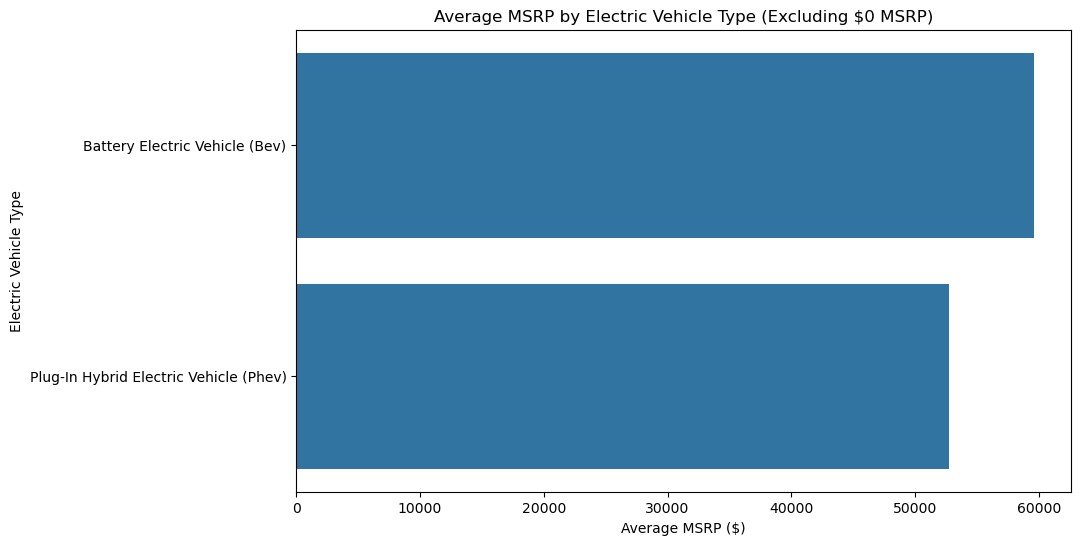

In [53]:
# To visualize the corrected MSRP data, we'll first filter out the $0 MSRP entries from the dataset
ev_pop_data_filtered = ev_pop_data[ev_pop_data['Base MSRP'] > 0]

# we can visualize the average MSRP by electric vehicle type using a bar graph
# We'll recalculate the average MSRP by electric vehicle type excluding $0 MSRP entries
ev_msrp_by_type = ev_pop_data_filtered.groupby('Electric Vehicle Type')['Base MSRP'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Base MSRP', y='Electric Vehicle Type', data=ev_msrp_by_type)

plt.title('Average MSRP by Electric Vehicle Type (Excluding $0 MSRP)')
plt.xlabel('Average MSRP ($)')
plt.ylabel('Electric Vehicle Type')
plt.show()

## Safety and performance

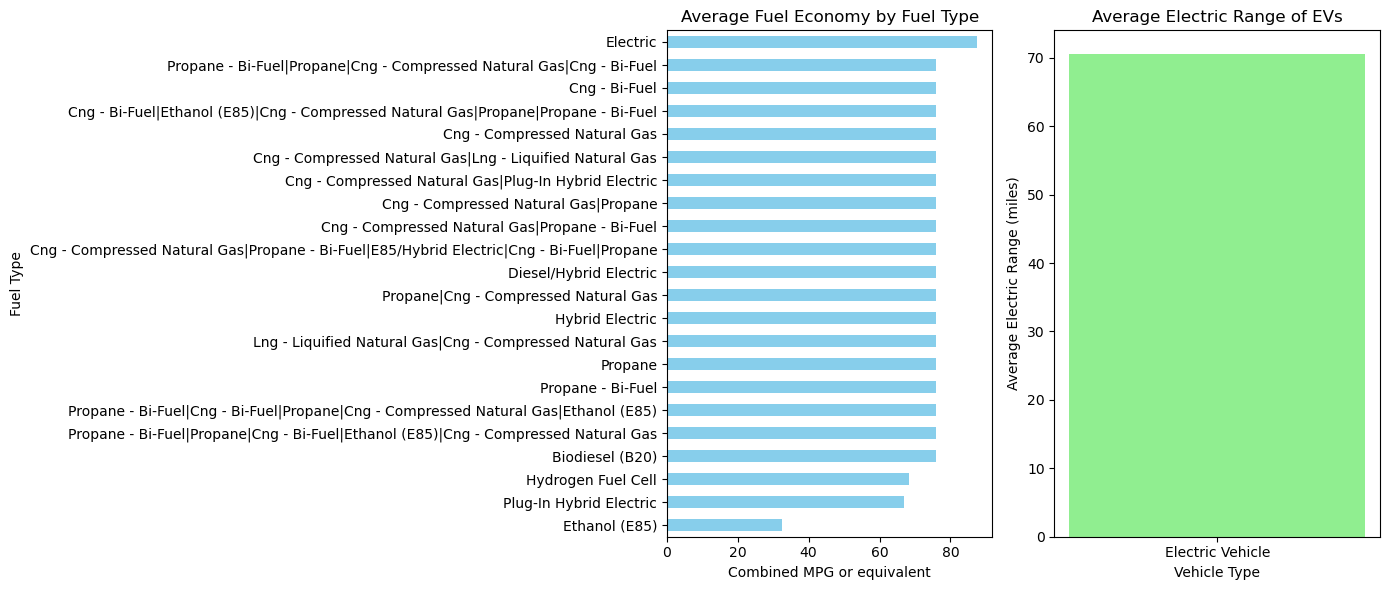

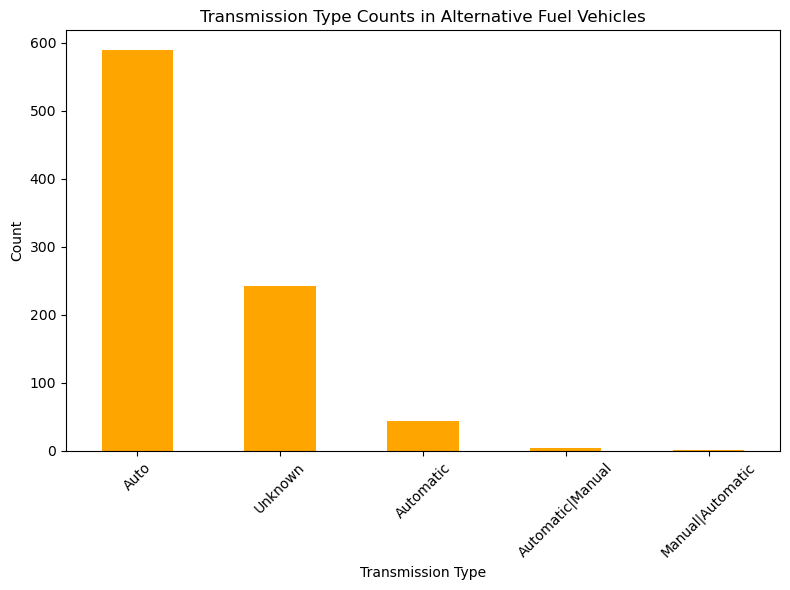

(70.49573804284242, 87.49186991869918)

In [54]:
# Load the datasets
alt_fuel_data = pd.read_csv('/Users/tanyaarya/Documents/Honda Case Competition/Cleaned_Alternative_Fuel_Vehicles_US.csv')
ev_pop_data = pd.read_csv('/Users/tanyaarya/Documents/Honda Case Competition/Cleaned_Electric_Vehicle_Population_Data.csv')

# Analyze the range and economy
# For the alternative fuel data, we'll consider 'Alternative Fuel Economy Combined' for fuel economy and 'All-Electric Range' for range
alt_fuel_economy_range = alt_fuel_data[['Fuel', 'Alternative Fuel Economy Combined', 'All-Electric Range']].groupby('Fuel').mean()

# For the electric vehicle population data, we'll consider 'Electric Range' for range
ev_range = ev_pop_data['Electric Range'].mean()

# Analyze the transmission types
# For the alternative fuel data, we'll look at the 'Transmission Type'
alt_fuel_transmission = alt_fuel_data['Transmission Type'].value_counts()

# Transmission data might not be relevant for the electric vehicle population data, as EVs typically have single-speed transmissions

# Range and Economy Analysis Visualization
plt.figure(figsize=(14, 6))

# Subplot for the average fuel economy
plt.subplot(1, 2, 1)
alt_fuel_economy_range['Alternative Fuel Economy Combined'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Fuel Economy by Fuel Type')
plt.xlabel('Combined MPG or equivalent')
plt.ylabel('Fuel Type')

# Subplot for the average electric range of EVs
plt.subplot(1, 2, 2)
plt.bar('Electric Vehicle', ev_range, color='lightgreen')
plt.title('Average Electric Range of EVs')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Electric Range (miles)')

plt.tight_layout()
plt.show()

# Transmission Analysis Visualization
plt.figure(figsize=(8, 6))
alt_fuel_transmission.plot(kind='bar', color='orange')
plt.title('Transmission Type Counts in Alternative Fuel Vehicles')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Output the average range and economy for EVs for marketing considerations
ev_range, alt_fuel_economy_range['Alternative Fuel Economy Combined'].get('Electric', None)

### Sustainability

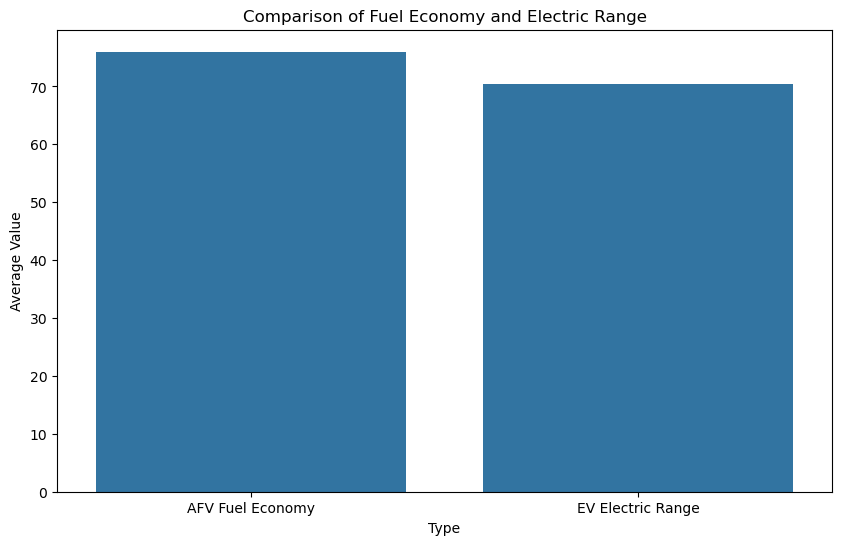

In [69]:
# Load the datasets for analysis
alt_fuel_data = pd.read_csv('/Users/tanyaarya/Documents/Honda Case Competition/Cleaned_Alternative_Fuel_Vehicles_US.csv')
ev_pop_data = pd.read_csv('/Users/tanyaarya/Documents/Honda Case Competition/Cleaned_Electric_Vehicle_Population_Data.csv')

# Extract the required columns for the analysis
# For alternative fuel data, we'll assume 'Alternative Fuel Economy Combined' is a measure of fuel efficiency
# For electric vehicle population data, 'Electric Range' is a measure of how far the vehicle can go on a single charge

# Calculate the average fuel economy for alternative fuel vehicles
afv_fuel_economy = alt_fuel_data['Alternative Fuel Economy Combined'].mean()

# Calculate the average electric range for electric vehicles
ev_electric_range = ev_pop_data['Electric Range'].mean()

# Prepare the data for comparison visualization
comparison_data = {
    'Type': ['AFV Fuel Economy', 'EV Electric Range'],
    'Average': [afv_fuel_economy, ev_electric_range]
}

comparison_df = pd.DataFrame(comparison_data)

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Average', data=comparison_df)
plt.title('Comparison of Fuel Economy and Electric Range')
plt.ylabel('Average Value')
plt.show()